# Video Game Sales Analysis and Exploration
Dataset: vgsales.csv

- This notebook will be a tool to explore global video game sales and will hopefully aim to explain what features like genres or platforms have the greatest impact.
- This notebook will include data wrangling, exploration and visualisation all to come up with an interesting research question and to then try answer it.


In [1]:
import pandas as pd
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("data_unzipped")



In [2]:
video_game_sales = pd.read_csv("data_unzipped/vgsales.csv")
video_game_sales.head

<bound method NDFrame.head of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales

## Initial Data Exploration
- basic diagnostics to get a feel for the data and what needs fixing.

In [3]:
video_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
video_game_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
video_game_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
video_game_sales.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

### Findings

- Using the head method I was able to get a feel for the data seing what each column represneted and their values enabling me to continue on.
- From the info method I found that the data types are all as expected expect from "Year" which has values stored as floats even though years are integers.
- The describe method tells me the number of features involved and number of entries essential for further cleaning.
- I then checked for missing values to find many missing values for Year (explaining why the values are stored as floats) and Publisher.
- Finally checked for duplicate entries and can see that the number unique ranks matches the number of rows.

## Reasearch Question
From my initail exploratory analysis and from my own personal interest in the data and by wanting to apply the things I have learned thus far I want to explore a question that uses linear regression to predict something (a numerical variable). Therefore my research question will be; **Can the year of release predict global sales?**

## Cleaning
Before I begin on a visualisation I need to clean the data for it to be ready to use. In this case removing missing values of the Year column is the only sensible way of continuing. Then changing all remaining values to integers instead of floats. Also important to check for outliers before running linear regression.


In [7]:
regression_data = video_game_sales.dropna(subset = ["Year"]) .copy()  # remove NAN values for column "Year"
regression_data["Year"] = regression_data["Year"].astype(int)         # recast data type of "Year" to integers

regression_data.sort_values("Global_Sales", ascending = False).head(10)  # checking for extreme outliers
regression_data.sort_values("Global_Sales", ascending = True).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16447,16450,Legacy of Kain: Defiance,PC,2003,Action,Eidos Interactive,0.00,0.01,0.00,0.0,0.01
16448,16451,Assassin's Creed Chronicles,XOne,2016,Action,Ubisoft,0.00,0.01,0.00,0.0,0.01
16449,16452,King's Bounty: Armored Princess,PC,2009,Role-Playing,1C Company,0.00,0.01,0.00,0.0,0.01
16450,16453,Hyperdimension Neptunia mk2,PS3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.0,0.01
16451,16454,Shin Koihime Musou: Otome Taisen * Sangokushi ...,PS3,2014,Adventure,Views,0.00,0.00,0.01,0.0,0.01
16562,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.0,0.01
16563,16566,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.0,0.01
16564,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007,Action,"Destination Software, Inc",0.01,0.00,0.00,0.0,0.01
16439,16442,Shin Sangoku Musou 4 Special,X360,2005,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01
16440,16443,Bullet Soul: Tama Tamashii,X360,2011,Shooter,5pb,0.00,0.00,0.01,0.0,0.01


From the top 10 games with global sales as someone experienced with gaming it is easy to tell that these maximum values are in fact not outliers and actually usefull data. as for the minimum global sales it goes without saying that lowest ranking games will have extremely low sales. So now the data is ready to be used.

## Visualisation


### Scatter Plot: Year vs Global Sales (messy)
This plot will help visualise if a linear relationship exists between the predictor (Year) and our target variable (Global Sales).

Text(0.5, 1.0, 'Scatter Plot of Global Sales vs Year (messy)')

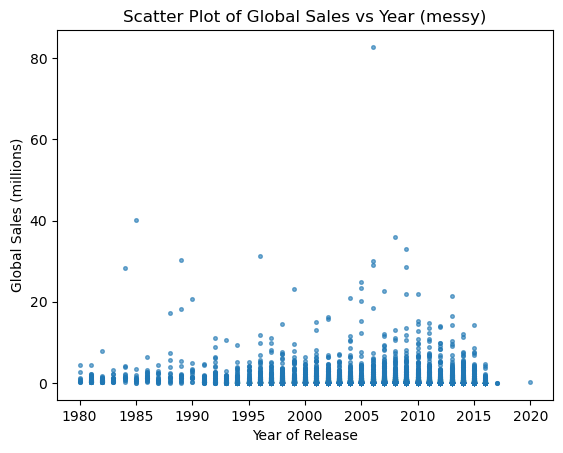

In [8]:
plt.scatter(regression_data["Year"], regression_data["Global_Sales"], s=7 , alpha = 0.6)
plt.xlabel("Year of Release")
plt.ylabel("Global Sales (millions)")
plt.title("Scatter Plot of Global Sales vs Year (messy)")

This is hard to read and messy but shows the raw realtionship beetween the two variables. However it is hard to say that linear regression will be a good model to predict Global Sales given the year of realese so another plot that clearly illustrates this is needed

### Line Plot: Year vs Global Sales (clear)


Text(0.5, 1.0, 'Average Global Sales Over Time')

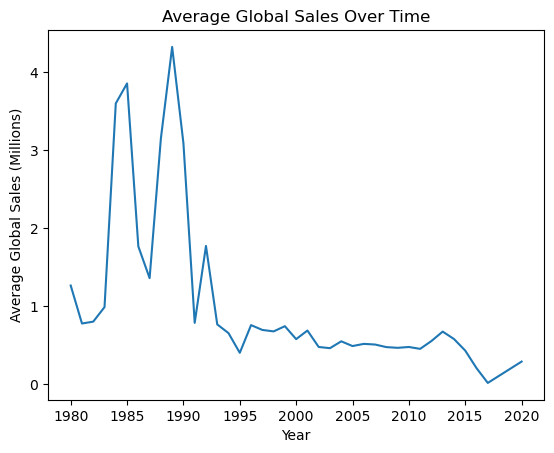

In [9]:
yearly_means = regression_data.groupby("Year")["Global_Sales"].mean()

plt.plot(yearly_means.index, yearly_means.values)
plt.xlabel("Year")
plt.ylabel("Average Global Sales (Millions)")
plt.title("Average Global Sales Over Time")

Now that the visualisation is clearer we see that linear regression is not  a good choice. There is not a linear relationship between the two variables as there are sharp humps up and down the plot. Using linear regression would explain very little variance. However as a final visualisation I will show the main regression plot.

### Final regression Plot

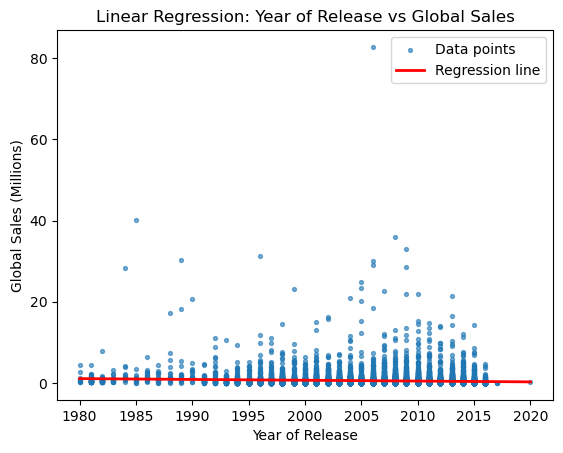

In [10]:
model = smf.ols("Global_Sales ~ Year", data=regression_data).fit()

plt.scatter(
    regression_data["Year"],
    regression_data["Global_Sales"],
    s=8,
    alpha=0.6,
    label="Data points"
)


years_sorted = np.linspace(regression_data["Year"].min(),  regression_data["Year"].max(),100)


pred_df = pd.DataFrame({"Year": years_sorted})        # small DataFrame for prediction


pred_sales = model.predict(pred_df)  # Get predicted sales from the statsmodels model


plt.plot(years_sorted, pred_sales, color="red", linewidth=2, label="Regression line")     # regression line
plt.xlabel("Year of Release")
plt.ylabel("Global Sales (Millions)")
plt.title("Linear Regression: Year of Release vs Global Sales")
plt.legend()
plt.show()



## Interpretation
- The first scatter plot shows the varying Global sales across time with almost all Sales being realtively low, with some big outliers breaking over 20 million in Global sales. However since the dataset is so massive the visualisation is hard to read with many data point overlapping. When looking at the Average global sales over time it becomes much clearer that big spikes at say 1985,1989 and 1992 correspond to widespread success in particular games as global sales spike dramatically and then quickly fall back down. However as a whole the plot shows a downward trend in global sales across time maybe implying that gaming across the globe may be fizzling out but not neceserally due to year of release. This is because the plot shows a clear non-linear realtionship meaning a low corelation between the variables.
- This is evidenced further by the regression plot which shows that the year of release is a bad predictor for global sales. We can also use the summary function as shown below to obtain an R^2 value of 0.006, which is shockingly low and firmly answers the question that the year of release does not predict the global sales, not even in the slightest. This implies that other features for exmaple genre, publisher or platforms has a much better chance at predicting the global success of a game.


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     91.69
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.15e-21
Time:                        17:24:10   Log-Likelihood:                -30441.
No. Observations:               16327   AIC:                         6.089e+04
Df Residuals:                   16325   BIC:                         6.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.8181      4.206      9.704      0.000      32.573      49.063
Year          -0.0201      0.002     -9.576      0.000      -0.024      -0.016
==============================================================================
Omnibus:                    33850.454   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246854425.198
Skew:                          17.372   Prob(JB):                         0.00
Kurtosis:                     604.380   Cond. No.                     6.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""